In [3]:
import json 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind


In [11]:
def get_results(results, random_counterpart=None, random_concepts=None, num_random_exp=100,
    min_p_val=0.05, name = '', key=True ):
  """Helper function to organize results.
  When run in a notebook, outputs a matplotlib bar plot of the
  TCAV scores for all bottlenecks for each concept, replacing the
  bars with asterisks when the TCAV score is not statistically significant.
  If you ran TCAV with a random_counterpart, supply it here, otherwise supply random_concepts.
  If you get unexpected output, make sure you are using the correct keywords.

  Args:
    results: dictionary of results from TCAV runs.
    random_counterpart: name of the random_counterpart used, if it was used. 
    random_concepts: list of random experiments that were run. 
    num_random_exp: number of random experiments that were run.
    min_p_val: minimum p value for statistical significance
  """
  weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  
    
  # helper function, returns if this is a random concept
  def is_random_concept(concept):
    if random_counterpart:
      # print('1')
      return random_counterpart == concept
    
    elif random_concepts:
      # print('2')
      return concept in random_concepts

    else:
      # print('3')
      return 'random500_' in concept

  # print class, it will be the same for all
#   print("Class =", results[0]['target_class'])

  # prepare data
  # dict with keys of concepts containing dict with bottlenecks
  result_summary = {}
    
  # random
  random_i_ups = {}
  b='dense'
  for result in results:
    if result['cav_concept'] not in result_summary:
      result_summary[result['cav_concept']] = {}
    
    if result['bottleneck'] not in result_summary[result['cav_concept']]:
      result_summary[result['cav_concept']][result['bottleneck']] = []
    result_summary[result['cav_concept']][result['bottleneck']].append(result)

    # store random
    if is_random_concept(result['cav_concept']):
        if result['bottleneck'] not in random_i_ups:
            random_i_ups[result['bottleneck']] = []
        try:
            random_i_ups[result['bottleneck']].append(result['i_up'][0]/result['i_up'][1])
        except:
            random_i_ups[result['bottleneck']].append(result['i_up'])
  # to plot, must massage data again 
  plot_data = {}
  plot_concepts = []
  # print concepts and classes with indentation
  day_scores =[]
  day_stds = []
  day_cts = []

  for concept in result_summary:
    if concept in weekdays:
#       print(" ", "Concept =", concept)
#       plot_concepts.append(concept)

      for bottleneck in result_summary[concept]:
        b=bottleneck
        if bottleneck not in plot_data:
          plot_data[bottleneck] = {'bn_vals': [], 'bn_stds': [], 'significant': []}
        i_ups = [item['i_up'][0]/item['i_up'][1] for item in result_summary[concept][bottleneck]]
#         plot_data[bottleneck]['bn_vals'].append(np.mean(i_ups))
#         plot_data[bottleneck]['bn_stds'].append(np.std(i_ups))
#         plot_data[bottleneck]['significant'].append(True)
        # Calculate statistical significance
        _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)
    
    
        day_scores=day_scores+i_ups
        day_stds.append(np.std(i_ups))
      day_cts.append(sum([item['i_up'][1] for item in result_summary[concept][bottleneck]]))
#       day_data[bottleneck]['significant'].append(True)
    # if not random
    if (not is_random_concept(concept) or not (random_concepts==None)) and not concept in weekdays:
#       print("!", "Concept =", concept)
      plot_concepts.append(concept)
      print(concept,np.mean([x['cav_accuracies']['overall'] for x in result_summary[concept][b] ]))
      print(concept,[x['cav_accuracies']for x in result_summary[concept][b] ])
      print()
      for bottleneck in result_summary[concept]:
        i_ups = [item['i_up'] for item in result_summary[concept][bottleneck]]
        b=bottleneck
        # Calculate statistical significance
        _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)
  
        if bottleneck not in plot_data:
          plot_data[bottleneck] = {'bn_vals': [], 'bn_stds': [], 'significant': []}
        try:
            if False:#p_val > min_p_val:
              # statistically insignificant
              plot_data[bottleneck]['bn_vals'].append(0.01)
              plot_data[bottleneck]['bn_stds'].append(0)
              plot_data[bottleneck]['significant'].append(False)
            else:
              plot_data[bottleneck]['bn_vals'].append(np.mean(i_ups))
              plot_data[bottleneck]['bn_stds'].append(np.std(i_ups))
              plot_data[bottleneck]['significant'].append(True)
        except:
            print(concept)
  if 'Monday' in result_summary:
    plot_concepts.append('weekday')
    plot_data[b]['bn_vals'].append(np.mean(day_scores))#sum(day_scores)/sum(day_cts))
    plot_data[b]['bn_stds'].append(1/sum(np.square(np.array([1/x for x in day_stds]))))#np.std(day_scores))
#     
    
  return plot_data, plot_concepts



In [12]:
# sorted(os.listdir(scores_dir),key=lambda f: int(re.sub('\D', '', f)))
# scores_dir = 'cnn_scores'

In [13]:
concepts= ['OASIS_temp_score', 'OASIS_gcs_score', 'OASIS_mechvent_score', 'OASIS_heartrate_score', 'OASIS_age_score', 'OASIS_preiculos_score', 'OASIS_meanbp_score', 'OASIS_electivesurgery_score', 'OASIS_resprate_score', 'OASIS_urineoutput_score']  
# concepts =  ['OASIS_discharge_'+ concept[6:] for concept in concepts]
concepts = ['filtered_meanbp_score', 'filtered_resprate_score', 'filtered_urineoutput_score', 'filtered_heartrate_score', 'filtered_preiculos_score', 'filtered_electivesurgery_score', 'filtered_gcs_score', 'filtered_age_score', 'filtered_mechvent_score', 'filtered_temp_score']

In [14]:
concepts

['filtered_meanbp_score',
 'filtered_resprate_score',
 'filtered_urineoutput_score',
 'filtered_heartrate_score',
 'filtered_preiculos_score',
 'filtered_electivesurgery_score',
 'filtered_gcs_score',
 'filtered_age_score',
 'filtered_mechvent_score',
 'filtered_temp_score']

In [21]:
# target = 'mortality_cnn_berttokenize_mortality2.ckpt_dense.json'
# target='distilbert_relative_layers/weekday_nocad_results_distilbert_final_relative_mimic_distilbert_cad_final1.h56.json'
# target='distilbert_separate_layers/weekday_nocad_distilbert_final_mimic_separate__layer6num_random10distilbert_cad_final1.h5.json'
target='mortality_cnn_mortality17.ckpt_dense.json'
# target='noweekday_mortality_cnn_mortality17.ckpt_dense.json'
# target='regular_mortality_cnn_berttokenize_mortality2.ckpt_dense_50randexp.json'
relative_cnn_target='mortality_dischargeconcepts_cnn_berttokenize_mortality2.ckpt_dense.json'
relative_distilbert_target='mortality_dischargeconcepts_distilbert_mortality_weighted3.h5_5.json'
target = 'regular_mortality_dischargeconcepts_distilbert_mortality_weighted3.h5_5_50randexp.json'
target = 'mortality_filtered_cnn_berttokenize_mortality2.ckpt_dense.json'
target='regular_mortality_filteredcnn_berttokenize_mortality2.ckpt_dense_50randexp.json'
target='mortality_filtered_distilbert_mortality_weighted3.h5_5.json'
target='mortality_filtered_disch_cnn_berttokenize_mortality2.ckpt_dense.json'
# target='regular_mortality_filtered_dischcnn_berttokenize_mortality2.ckpt_dense_50randexp.json'
# target='regular_mortality_filtered_disch_randdisch_cnn_berttokenize_mortality2.ckpt_dense_50randexp.json'
# target='regular_mortality_filtered_disch_distilbert_mortality_weighted3.h5_5_10randexp.json'
# target='mortality_filtered_dischdistilbert_mortality_weighted3.h5_5.json'
target='mortality_filtered_cnn_mortality17.ckpt_dense.json'
# target='regular_mortality_filtered_distilbert_mortality_weighted3.h5_5_10randexp.json'
# target='regular_mortality_filtered_cnn_berttokenize_mortality2.ckpt_dense_50randexp.json'

In [22]:
scores_dir = 'results/'
num_epochs = len(os.listdir(scores_dir))
import re
def plot_individual(target, relative=True):
    epoch_scores = []
    fn=target
#     dicts = eval(open(scores_dir+fn, 'r').read())
#         results = get_results(dicts, random_concepts= ['n2c2_CAD', 'n2c2_DIABETES', 'n2c2_MEDICATION', 'n2c2_HYPERTENSION', 'n2c2_FAMILY_HIST', 'n2c2_SMOKER', 'n2c2_HYPERLIPIDEMIA', 'n2c2_OBESE'] )
    dicts = open(scores_dir+target, 'r').read()

#     dicts=dicts.replace('WEEKDAY_discharge_','')
    dicts=dicts.replace('WEEKDAY_discharge_','')
    dicts=dicts.replace('filtered_disch_','filtered_')
    dicts = eval(dicts)
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  
#     weekdays = ['WEEKDAY_discharge'+x for x in weekdays]
    if relative:
        results = get_results(dicts, random_concepts=concepts+weekdays  )
    else:
        results = get_results(dicts, num_random_exp=10)
#         results = get_results(dicts, random_concepts=  ['mimic_exclusiveHYPERTENSION', 'mimic_exclusiveDIABETES', 'mimic_exclusiveSMOKER', 'mimic_exclusiveHYPERLIPIDEMIA', 'mimic_exclusiveOBESE', 'mimic_exclusiveMEDICATION']   )
#         results = get_results(dicts, random_concepts=   ['cat_mimic_exclusiveDIABETES', 'cat_mimic_exclusiveHYPERLIPIDEMIA', 'cat_mimic_exclusiveHYPERTENSION', 'cat_mimic_exclusiveMEDICATION', 'cat_mimic_exclusiveOBESE', 'cat_mimic_exclusiveSMOKER']    )
    #     print(results[1])
    epoch_scores.append({k:(v,q) for k,v,q in zip(results[1],results[0][list(results[0].keys())[0]]['bn_vals'] ,results[0][list(results[0].keys())[0]]['bn_stds'])})

    epoch_scores = {k: v for d in epoch_scores for k, v in d.items()}

    epoch_scores=dict(sorted(epoch_scores.items()))
    concept_labels = epoch_scores.keys()
#     return concept_labels
    concept_labels = [x.split('-') for x in concept_labels]
    for i, label in enumerate(concept_labels):
        if all([ x.isnumeric() for x in label[-5:-1]]) and len(label)>3:
            newlabel = '-'.join(label[:-5]+[label[-5]+'.' + label[-4]] +[label[-3]+'.'+label[-2]])
            concept_labels[i] = newlabel
        else:
            if all([ x.isnumeric() for x in label[-2:]]) :
                newlabel = '-'.join(label[:-2]+[label[-2]+'.' + label[-1]])
                concept_labels[i] = newlabel
            else:   
                concept_labels[i] = '-'.join(label)


    high_concepts = [concept_labels[i] for i,x in enumerate(epoch_scores.items()) if x[1][0] >0.5]
    high_scores = [x[1][0] for i,x in enumerate(epoch_scores.items()) if x[1][0] >0.5]
    # pd.DataFrame(zip(high_concepts, high_scores)).to_csv()
    scores = [x[1][0] if x[1][0] >0.1 else '' for i,x in enumerate(epoch_scores.items()) ]
    errs = [x[1][1] if x[1][0] >0.1 else '' for i,x in enumerate(epoch_scores.items()) ]

#     pd.DataFrame(zip(concept_labels,scores,errs )).to_csv('plots/scores_bert'+target+'_first.csv',header = ['category','TCAV', 'stdev'])

    # plt.tight_layout()
    heights = [v[0] for v in epoch_scores.values()]
    fig, ax = plt.subplots(figsize=(3,len(heights)))

    errs = [v[1] for v in epoch_scores.values()]
    ax.barh(range(len(heights)),heights, xerr=errs)
    plt.yticks(range(len(heights)),range(len(heights)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax.text(1.05, 1, '\n'.join([str(i)+' '+phe for i,phe in enumerate(epoch_scores[0].keys())]), transform=ax.transAxes, fontsize=14,
    #         verticalalignment='top', bbox=props)
    ax.invert_yaxis()
    ax.set_yticklabels(concepts+['Weekday'], fontsize=16)
    for i, v in enumerate(heights):
        ax.text(0.05, i+0.15, str(v)[:5], color='black', fontweight='bold', fontsize = 14)
    plt.xlabel('TCAV score')
    plt.ylabel('Clinical Concept')        
    plt.title('Regular TCAV Scores for Distilbert \n30day post-discharge mortality prediction\n based on Discharge Summaries')
    plt.savefig('plots/tcav_'+target.split('/')[-1]+'.pdf', bbox_inches = "tight")
#     plt.show()

filtered_meanbp_score 0.5433273281596454
filtered_meanbp_score [{'filtered_meanbp_score': 1.0, 'Monday': 0.0, 'overall': 0.5}, {'filtered_meanbp_score': 0.6878787878787879, 'Tuesday': 0.2909090909090909, 'overall': 0.4893939393939394}, {'filtered_meanbp_score': 0.3181818181818182, 'Wednesday': 0.8787878787878788, 'overall': 0.5984848484848485}, {'filtered_meanbp_score': 0.3878787878787879, 'Thursday': 0.7454545454545455, 'overall': 0.5666666666666667}, {'filtered_meanbp_score': 0.4818181818181818, 'Friday': 0.7121212121212122, 'overall': 0.5969696969696969}, {'filtered_meanbp_score': 0.5272727272727272, 'Saturday': 0.603030303030303, 'overall': 0.5651515151515152}, {'filtered_meanbp_score': 0.5181818181818182, 'Sunday': 0.6212121212121212, 'overall': 0.5696969696969697}, {'filtered_meanbp_score': 0.37272727272727274, 'filtered_resprate_score': 0.693939393939394, 'overall': 0.5333333333333333}, {'filtered_meanbp_score': 0.0, 'filtered_urineoutput_score': 1.0, 'overall': 0.5}, {'filtered

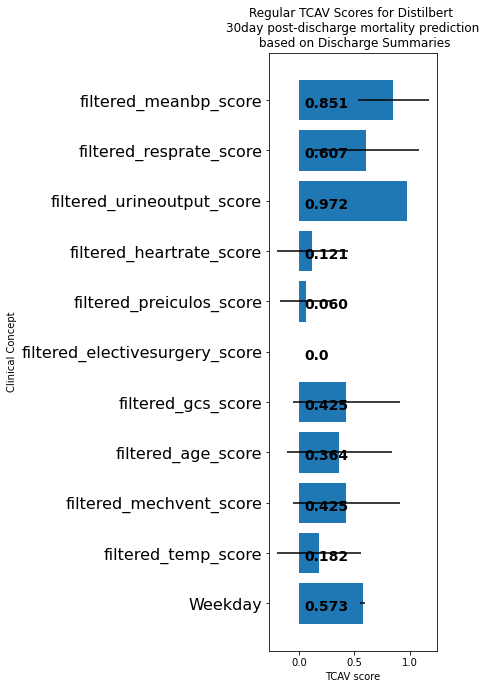

In [23]:
plot_individual(target, relative=True)

In [41]:
plot_individual(relative_distilbert_target, relative=True)

TypeError: 'float' object is not subscriptable

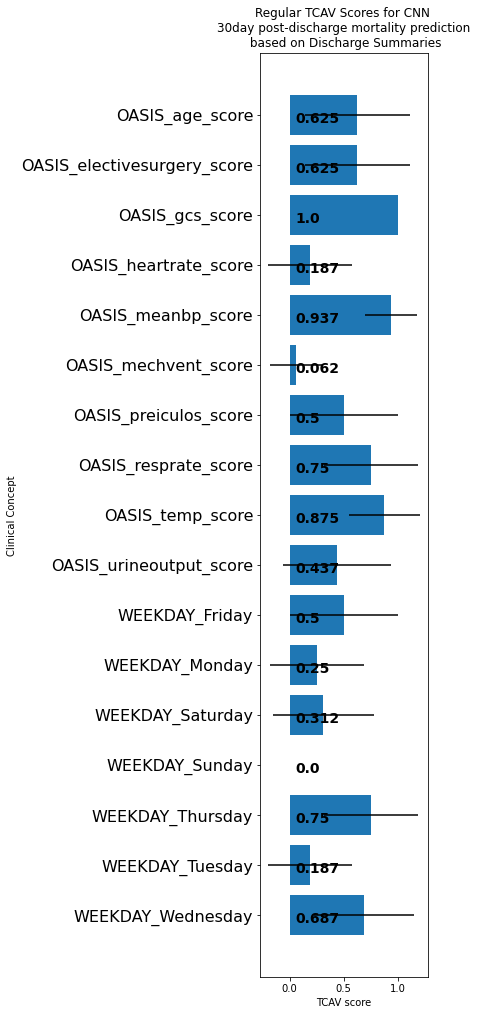

In [107]:
plot_individual(relative_cnn_target, relative=True)

In [113]:
target_text = open(scores_dir+target,'r').read()

In [117]:
target_results =eval(target_text)

In [130]:
target_results[800]['cav_accuracies']

{'OASIS_discharge_urineoutput_score': 0.6303030303030303,
 'random500_0': 0.8909090909090909,
 'overall': 0.7606060606060606}

In [ ]:
dicts = open(scores_dir+target, 'r').read()

dicts=dicts.replace('WEEKDAY_discharge_','')

eval(dicts)

In [59]:
scores_dir = 'cnn_scores/'
num_epochs = len(os.listdir(scores_dir))
import re
def plot_multiple(target):
    epoch_scores = []
    for fn in sorted(os.listdir(scores_dir)):
    #     if 'first' not in fn:
        if target not in fn:
            continue
        print(fn)
        dicts = eval(open(scores_dir+fn, 'r').read())
        results = get_results(dicts)
    #     print(results[1])

        epoch_scores.append({k:(v,q) for k,v,q in zip(results[1],results[0][list(results[0].keys())[0]]['bn_vals'] ,results[0][list(results[0].keys())[0]]['bn_stds'])})
    epoch_scores = {k: v for d in epoch_scores for k, v in d.items()}
    epoch_scores=dict(sorted(epoch_scores.items()))
    concept_labels = epoch_scores.keys()
    concept_labels = [x.split('-') for x in concept_labels]
    for i, label in enumerate(concept_labels):
        if all([ x.isnumeric() for x in label[-5:-1]]) and len(label)>3:
            newlabel = '-'.join(label[:-5]+[label[-5]+'.' + label[-4]] +[label[-3]+'.'+label[-2]])
            concept_labels[i] = newlabel
        else:
            if all([ x.isnumeric() for x in label[-2:]]) :
                newlabel = '-'.join(label[:-2]+[label[-2]+'.' + label[-1]])
                concept_labels[i] = newlabel
            else:   
                concept_labels[i] = '-'.join(label)


    high_concepts = [concept_labels[i] for i,x in enumerate(epoch_scores.items()) if x[1][0] >0.5]
    high_scores = [x[1][0] for i,x in enumerate(epoch_scores.items()) if x[1][0] >0.5]
    # pd.DataFrame(zip(high_concepts, high_scores)).to_csv()
    scores = [x[1][0] if x[1][0] >0.1 else '' for i,x in enumerate(epoch_scores.items()) ]
    errs = [x[1][1] if x[1][0] >0.1 else '' for i,x in enumerate(epoch_scores.items()) ]

    pd.DataFrame(zip(concept_labels,scores,errs )).to_csv('plots/scores_bert'+target+'_first.csv',header = ['category','TCAV', 'stdev'])

    # plt.tight_layout()
    heights = [v[0] for v in epoch_scores.values()]
    fig, ax = plt.subplots(figsize=(10,len(heights)))

    errs = [v[1] for v in epoch_scores.values()]
    ax.barh(range(len(heights)),heights, xerr=errs)
    plt.yticks(range(len(heights)),range(len(heights)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax.text(1.05, 1, '\n'.join([str(i)+' '+phe for i,phe in enumerate(epoch_scores[0].keys())]), transform=ax.transAxes, fontsize=14,
    #         verticalalignment='top', bbox=props)
    ax.invert_yaxis()
    ax.set_yticklabels(concept_labels, fontsize=24)
    for i, v in enumerate(heights):
        ax.text(0.05, i+0.15, str(v)[:5], color='black', fontweight='bold', fontsize = 24)
    plt.xlabel('TCAV score')
    plt.ylabel('Clinical Concept')
    plt.title('TCAV Scores for BERT prediction of '+target + '\n from First 512 Tokens')
    plt.savefig('plots/all_tcav_'+target+'_first.pdf', bbox_inches = "tight")
    plt.show()

In [60]:
plot_multiple('resultsBert_weighted6first.h5.json')

FileNotFoundError: [Errno 2] No such file or directory: 'cnn_scores/'

In [45]:
pd.read_csv('../notes_benchmark/data/phenotyping/train/95147_episode1_timeseries.csv')

,Hours,CUIS,Capillary refill rate,DOC2VEC,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,...,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,TEXT,Temperature,WORDS,Weight,pH
0,0.113333,C0011900 C0470187 C1265876 C0029053 C0175722 C...,NaN,"[0.13600826263427734, -0.9509252309799194, -1....",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[**2190-5-9**] 10:34 PM\n CHEST (PORTABLE AP) ...,NaN,**2190-5-9** 10 34 PM CHEST PORTABLE AP ...,NaN,NaN
1,0.180000,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,...,NaN,78.0,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN
2,0.246667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.701098,NaN
3,0.546667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,64.546667,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,...,NaN,87.0,98.0,25.0,128.0,NaN,NaN,NaN,NaN,NaN
118,65.546667,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,...,NaN,77.0,97.0,23.0,138.0,NaN,36.666667,NaN,NaN,NaN
119,65.696667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.701098,NaN
120,65.730000,NaN,NaN,NaN,NaN,NaN,Spontaneously,Obeys Commands,NaN,Oriented,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
metrics = pd.read_csv('cnn_all_epochs_metrics.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cnn_all_epochs_metrics.csv'

In [9]:
metrics

,Unnamed: 0,loss,accuracy
0,0,0.604182,0.692553
1,1,0.442200,0.841489
2,2,0.543712,0.848936
3,3,0.611940,0.850000
4,4,0.655441,0.847872
...,...,...,...
95,95,1.846229,0.846808
96,96,1.850269,0.846808
97,97,1.842900,0.846808
98,98,1.846784,0.847872


In [13]:
results[1]

['cat_Radiology', 'cat_Rehab_Services', 'cat_ECG']

ValueError: not enough values to unpack (expected 2, got 0)

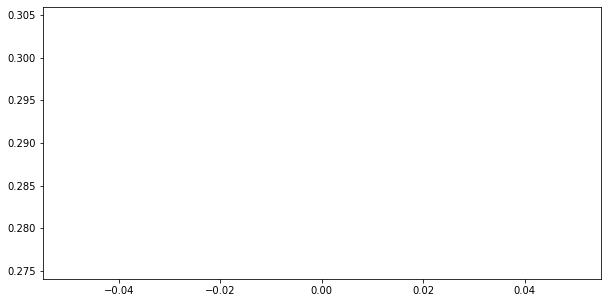

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]
xs = np.array(range(num_epochs))
concept_scores = np.array(epoch_scores).transpose()
for i, ys in enumerate(concept_scores):
    reduced_xs,reduced_ys = zip(*[ (xs[i], ys[i]) for i in range(len(ys)) if ys[i]>0.01])
    plt.plot(reduced_xs,reduced_ys)
# plt.plot(xs,concept_scores[1])
plt.plot(xs,metrics['loss'],linestyle='dashed', label='loss')
plt.plot(xs,metrics['accuracy'],linestyle='dotted', label='loss')

plt.savefig('every_1000_steps_new.pdf')
plt.xlabel('steps (x1000)')
plt.ylabel('TCAV')
plt.title('CNN TCAV after each 1000 steps of training')
plt.legend(results[1]+['loss','accuracy'], bbox_to_anchor=(1, 1), loc='upper left')

In [11]:
# plt.ylabel('TCAV')

In [6]:
plt.show()

In [7]:
plt.savefig('every_100_steps.pdf')

<Figure size 432x288 with 0 Axes>

In [62]:
len(os.listdir(scores_dir))

10

In [80]:
def toy_dataset():
  inputs = tf.range(10.)[:, None]
  labels = inputs * 5. + tf.range(5.)[None, :]
  return tf.data.Dataset.from_tensor_slices(
    dict(x=inputs, y=labels)).repeat().batch(2)

In [81]:

import tensorflow as tf
toy_dataset()

TypeError: 'dict' object is not callable

In [8]:
import imageio
import os
from pdf2image import convert_from_path

images = []
filenames = ['plots/'+x for x in sorted(os.listdir('plots')) if 'ckptplot' in x ]
for filename in filenames:
    
    images.append(convert_from_path(filename,500))
# imageio.mimsave('plots/movie.gif', images)

FileNotFoundError: The directory '/plots' does not exist

In [11]:
len(images[0])

1

In [12]:
imageio.mimsave('plots/movie.gif', [image[0] for image in images])

In [13]:
import cv2
import numpy as np
import glob

img_array = [image[0] for image in images]
for filename in glob.glob('C:/New folder/Images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

ModuleNotFoundError: No module named 'cv2'

In [14]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/gpfs/gsfs12/users/moldwinar/chiqa-fsl-ks/tr3/bin/python3 -m pip install --upgrade pip' command.
